# Problem Set 1
Plot the Moment-Capacity Curve and comment on As = atleast twice Asb

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import math

def centroid_of_tbeam(bf, tf, bw, y):
    # Calculate centroid of t-beam from top of flange
    # y - height of beam
    kd_prime = 0
    if (y <= tf):
        kd_prime = y / 2
    else:
        a_total = bf * tf + bw * (y - tf)
        ay = bf * tf * tf / 2
        ay += bw * (y - tf) * ((y - tf) / 2 + tf)
        kd_prime = ay / a_total
    return kd_prime

def area_of_tbeam(bf, tf, bw, y):
    # Calculate the area of t-beam
    area = 0
    if (y <= tf):
        area = bf * y
    else:
        area = bf * tf + bw * (y - tf)
    return area

In [2]:
student_number = [3, 3, 8]
d = 435
bw = 250
tf = 125
ϵcu = 0.003
Es = 200000
fc_base = 28        # Basis for calculating β1
student_number_reversed = ['.']

# Reverse the student number then append decimal at the start
for i in range(len(student_number)):
    student_number_reversed.append(str(student_number[len(student_number) - 1 - i]))

# Converted student number
student_number_reversed = float(''.join(student_number_reversed))

# Factor for calculating flange width
α = 10 + 10 * student_number_reversed

# Calculate for b then round to the nearest 25mm
bf = bw + α * tf
bf = int(round(bf / 100 * 4) / 4 * 100)
print('bf = ', bf)
# Given arrays
fcPrime = [20, 40, 20, 40]
fy = [300, 300, 400, 400]
β1 = []

# Calculate for corresponding β1
for fcx in fcPrime:
    if fcx <= fc_base:
        β1.append(0.85)
    else:
        β1.append(round(0.85 - (0.05 / 7)*(fcx - fc_base), 3))
        
# Results array
M = ([0], [0], [0], [0])
As = ([0], [0], [0], [0])
MnMax = []
        
# -------------------------------------
# Start of problem main calculation
# -------------------------------------
for i in range(4):     # 4 cases
    print('= = = = = = = = = = = = =')
    print('Case # ', i+1)
    print('= = = = = = = = = = = = =')
    
    # Calculate balanced value for 'c'
    c_bal = 600 * d / (600 + fy[i])
    
    # Balanced equivalent compression block height
    a_bal = β1[i] * c_bal
    
    # Web component of the compression, z
    z_bal = a_bal - tf if a_bal > tf else 0
    
    # Balanced equation
    # Asb.fy = 0.85 f'c.bf.tf + 0.85f'c.bw.z
    As_bal = (0.85 * fcPrime[i] * bf * tf + 0.85 * fcPrime[i] * bw * z_bal) / fy[i]
    
    print('cb = ', c_bal, 'ab = ', a_bal, 'zb = ', z_bal, 'Asb = ', round(As_bal, 3))
    
    As_limit = 2 * As_bal
    
    As_trial = 100
    Mmax = 0.0
    while (As_trial <= As_limit):
        a = 10
        c = a / β1[i]
        As_calc = 0
        fs = 0.0
        fs_actual = 0.0
        steel_yields = False
        while (As_calc < As_trial):
            c = a / β1[i]
            fs = 600 * (d - c) / c
            fs_actual = fs
            if (fs >= fy[i]):
                fs = fy[i]
                steel_yields = True
            Ac = area_of_tbeam(bf, tf, bw, a)
            
            As_calc = 0.85 * fcPrime[i] * Ac / fs
            # Try for a
            a += 0.02
        
        # Calculate for the strain in concrete
        ϵc = (fs/Es) / (d-c) * c
        
        # Calculate moment
        Mn = As_calc * fs * (d - centroid_of_tbeam(bf, tf, bw, a))
        Mmax = Mn
        M[i].append(Mn/1000**2)
        As[i].append(As_calc)
        
        print('As = ', round(As_trial, 2),'M = ', round(Mn / 1000**2, 2), 'c = ', \
              round(c, 2), 'a = ', round(a, 2), 'fs = ', round(fs, 2), 'fs (actual) = ', fs_actual,
             'ϵc = ', ϵc)
        # Increment steel area each loop
        As_trial += 100
        
    MnMax.append(Mmax)

bf =  2550
= = = = = = = = = = = = =
Case #  1
= = = = = = = = = = = = =
cb =  290.0 ab =  246.5 zb =  121.5 Asb =  19783.75
As =  100 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  200 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  300 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  400 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  500 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  600 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  700 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  800 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  900 M =  186.4 c =  11.76 a =

As =  9000 M =  1090.65 c =  73.29 a =  62.32 fs =  300 fs (actual) =  2960.9951845904466 ϵc =  0.000303951862091422
As =  9100 M =  1101.63 c =  74.09 a =  63.0 fs =  300 fs (actual) =  2922.546840266507 ϵc =  0.0003079505818691786
As =  9200 M =  1112.91 c =  74.92 a =  63.7 fs =  300 fs (actual) =  2883.8253768841764 ϵc =  0.00031208547064399695
As =  9300 M =  1123.84 c =  75.72 a =  64.38 fs =  300 fs (actual) =  2847.0167806088352 ϵc =  0.0003161203706735915
As =  9400 M =  1135.08 c =  76.54 a =  65.08 fs =  300 fs (actual) =  2809.929296034203 ϵc =  0.0003202927565722796
As =  9500 M =  1146.29 c =  77.36 a =  65.78 fs =  300 fs (actual) =  2773.631386861099 ϵc =  0.00032448435803811846
As =  9600 M =  1157.17 c =  78.16 a =  66.46 fs =  300 fs (actual) =  2739.102950029899 ϵc =  0.0003285747255283617
As =  9700 M =  1168.34 c =  78.99 a =  67.16 fs =  300 fs (actual) =  2704.289544235732 ϵc =  0.0003328045999801962
As =  9800 M =  1179.49 c =  79.81 a =  67.86 fs =  300 fs (ac

As =  17600 M =  1975.21 c =  143.29 a =  121.82 fs =  300 fs (actual) =  1221.4285714286757 ϵc =  0.0007368421052630949
As =  17700 M =  1984.7 c =  144.12 a =  122.52 fs =  300 fs (actual) =  1211.0204081633701 ϵc =  0.0007431749241657597
As =  17800 M =  1994.17 c =  144.94 a =  123.22 fs =  300 fs (actual) =  1200.7305194806254 ϵc =  0.0007495437031027528
As =  17900 M =  2003.35 c =  145.74 a =  123.9 fs =  300 fs (actual) =  1190.845979980733 ϵc =  0.0007557652417943766
As =  18000 M =  2012.78 c =  146.56 a =  124.6 fs =  300 fs (actual) =  1180.783432332745 ϵc =  0.0007622058163722439
As =  18100 M =  2021.97 c =  150.19 a =  127.68 fs =  300 fs (actual) =  1137.8192072694196 ϵc =  0.000790986823082248
As =  18200 M =  2031.08 c =  158.49 a =  134.74 fs =  300 fs (actual) =  1046.7488123516023 ϵc =  0.0008598051312597913
As =  18300 M =  2039.99 c =  166.8 a =  141.8 fs =  300 fs (actual) =  964.7482014388617 ϵc =  0.0009328859060402561
As =  18400 M =  2048.68 c =  175.11 a = 

As =  25200 M =  2160.95 c =  311.25 a =  264.58 fs =  238.56 fs (actual) =  238.56214091305756 ϵc =  0.0029999999999999996
As =  25300 M =  2161.17 c =  311.6 a =  264.88 fs =  237.61 fs (actual) =  237.61232349150035 ϵc =  0.003
As =  25400 M =  2161.37 c =  311.93 a =  265.16 fs =  236.73 fs (actual) =  236.7277664628462 ϵc =  0.0030000000000000005
As =  25500 M =  2161.57 c =  312.26 a =  265.44 fs =  235.85 fs (actual) =  235.84507572887986 ϵc =  0.0029999999999999996
As =  25600 M =  2161.77 c =  312.59 a =  265.72 fs =  234.96 fs (actual) =  234.96424538938484 ϵc =  0.003
As =  25700 M =  2161.96 c =  312.89 a =  265.98 fs =  234.15 fs (actual) =  234.1479921791239 ϵc =  0.003
As =  25800 M =  2162.16 c =  313.22 a =  266.26 fs =  233.27 fs (actual) =  233.27073317292684 ϵc =  0.003
As =  25900 M =  2162.36 c =  313.55 a =  266.54 fs =  232.4 fs (actual) =  232.39531742443455 ϵc =  0.003
As =  26000 M =  2162.55 c =  313.86 a =  266.8 fs =  231.58 fs (actual) =  231.584076767225

As =  33400 M =  2173.94 c =  333.6 a =  283.58 fs =  182.37 fs (actual) =  182.37410071933562 ϵc =  0.0029999999999999996
As =  33500 M =  2174.06 c =  333.81 a =  283.76 fs =  181.88 fs (actual) =  181.87777542812066 ϵc =  0.003
As =  33600 M =  2174.19 c =  334.05 a =  283.96 fs =  181.33 fs (actual) =  181.32704092405126 ϵc =  0.003
As =  33700 M =  2174.3 c =  334.26 a =  284.14 fs =  180.83 fs (actual) =  180.8320427987303 ϵc =  0.0029999999999999996
As =  33800 M =  2174.42 c =  334.47 a =  284.32 fs =  180.34 fs (actual) =  180.33767147370875 ϵc =  0.003
As =  33900 M =  2174.55 c =  334.71 a =  284.52 fs =  179.79 fs (actual) =  179.7891036905995 ϵc =  0.003
As =  34000 M =  2174.66 c =  334.92 a =  284.7 fs =  179.3 fs (actual) =  179.29605170709462 ϵc =  0.0029999999999999996
As =  34100 M =  2174.78 c =  335.13 a =  284.88 fs =  178.8 fs (actual) =  178.8036228321837 ϵc =  0.003
As =  34200 M =  2174.89 c =  335.34 a =  285.06 fs =  178.31 fs (actual) =  178.3118158854055 ϵ

As =  6100 M =  777.18 c =  27.64 a =  21.14 fs =  300 fs (actual) =  8841.47727272738 ϵc =  0.00010179294389820584
As =  6200 M =  789.37 c =  28.09 a =  21.48 fs =  300 fs (actual) =  8691.891891891997 ϵc =  0.00010354477611940173
As =  6300 M =  801.56 c =  28.53 a =  21.82 fs =  300 fs (actual) =  8546.972477064326 ϵc =  0.0001053004443871952
As =  6400 M =  814.45 c =  29.01 a =  22.18 fs =  300 fs (actual) =  8398.375451263644 ϵc =  0.00010716358243600355
As =  6500 M =  826.61 c =  29.45 a =  22.52 fs =  300 fs (actual) =  8262.400000000105 ϵc =  0.00010892718822617988
As =  6600 M =  838.77 c =  29.9 a =  22.86 fs =  300 fs (actual) =  8130.472854641086 ϵc =  0.00011069466882067709
As =  6700 M =  851.62 c =  30.37 a =  23.22 fs =  300 fs (actual) =  7995.000000000105 ϵc =  0.00011257035647279402
As =  6800 M =  863.76 c =  30.81 a =  23.56 fs =  300 fs (actual) =  7870.858113848873 ϵc =  0.00011434585492227828
As =  6900 M =  875.88 c =  31.26 a =  23.9 fs =  300 fs (actual) =

As =  13800 M =  1702.32 c =  62.51 a =  47.78 fs =  300 fs (actual) =  3575.1256281405294 ϵc =  0.00025173940543960746
As =  13900 M =  1713.73 c =  62.96 a =  48.12 fs =  300 fs (actual) =  3545.613305613129 ϵc =  0.0002538347875035308
As =  14000 M =  1725.8 c =  63.43 a =  48.48 fs =  300 fs (actual) =  3514.8163433758014 ϵc =  0.0002560588981259817
As =  14100 M =  1737.19 c =  63.87 a =  48.82 fs =  300 fs (actual) =  3486.1475409834256 ϵc =  0.0002581646328560478
As =  14200 M =  1748.57 c =  64.32 a =  49.16 fs =  300 fs (actual) =  3457.8754578752755 ϵc =  0.00026027542372882733
As =  14300 M =  1760.61 c =  64.79 a =  49.52 fs =  300 fs (actual) =  3428.3636363634514 ϵc =  0.00026251591005516903
As =  14400 M =  1771.96 c =  65.24 a =  49.86 fs =  300 fs (actual) =  3400.8828250399424 ϵc =  0.0002646371681416074
As =  14500 M =  1783.31 c =  65.68 a =  50.2 fs =  300 fs (actual) =  3373.7744121161936 ϵc =  0.00026676353841793377
As =  14600 M =  1794.65 c =  66.13 a =  50.54 

As =  20900 M =  2500.72 c =  94.66 a =  72.34 fs =  300 fs (actual) =  2157.2455752211295 ϵc =  0.00041719867702486545
As =  21000 M =  2512.04 c =  95.13 a =  72.7 fs =  300 fs (actual) =  2143.5883324159645 ϵc =  0.0004198567357313617
As =  21100 M =  2522.71 c =  95.58 a =  73.04 fs =  300 fs (actual) =  2130.8134757599637 ϵc =  0.00042237390097179265
As =  21200 M =  2533.38 c =  96.02 a =  73.38 fs =  300 fs (actual) =  2118.1570338057895 ϵc =  0.00042489767549619715
As =  21300 M =  2544.66 c =  96.49 a =  73.74 fs =  300 fs (actual) =  2104.8833423764645 ϵc =  0.0004275771402057266
As =  21400 M =  2555.3 c =  96.94 a =  74.08 fs =  300 fs (actual) =  2092.465568457915 ϵc =  0.0004301146043054239
As =  21500 M =  2565.94 c =  97.38 a =  74.42 fs =  300 fs (actual) =  2080.161290322492 ϵc =  0.00043265875785068134
As =  21600 M =  2577.19 c =  97.85 a =  74.78 fs =  300 fs (actual) =  2067.2552166933338 ϵc =  0.0004353598881900948
As =  21700 M =  2587.8 c =  98.3 a =  75.12 fs 

As =  28000 M =  3247.41 c =  126.83 a =  96.92 fs =  300 fs (actual) =  1457.8328173375041 ϵc =  0.000617354740061144
As =  28100 M =  3257.37 c =  127.28 a =  97.26 fs =  300 fs (actual) =  1450.6375976964653 ϵc =  0.0006204168438961955
As =  28200 M =  3267.32 c =  127.72 a =  97.6 fs =  300 fs (actual) =  1443.4925189588482 ϵc =  0.0006234878173453545
As =  28300 M =  3277.85 c =  128.19 a =  97.96 fs =  300 fs (actual) =  1435.9812129875895 ϵc =  0.0006267491467576591
As =  28400 M =  3287.78 c =  128.64 a =  98.3 fs =  300 fs (actual) =  1428.9377289377762 ϵc =  0.0006298385029479412
As =  28500 M =  3297.7 c =  129.08 a =  98.64 fs =  300 fs (actual) =  1421.942810788935 ϵc =  0.0006329368475098193
As =  28600 M =  3308.19 c =  129.55 a =  99.0 fs =  300 fs (actual) =  1414.588805819407 ϵc =  0.0006362272883098851
As =  28700 M =  3318.09 c =  130.0 a =  99.34 fs =  300 fs (actual) =  1407.6923076923583 ϵc =  0.000639344262295059
As =  28800 M =  3327.98 c =  130.45 a =  99.68 f

As =  35200 M =  3950.41 c =  159.42 a =  121.82 fs =  300 fs (actual) =  1037.1428571429508 ϵc =  0.000867768595041244
As =  35300 M =  3960.18 c =  159.9 a =  122.18 fs =  300 fs (actual) =  1032.3182711199368 ϵc =  0.0008718241507278681
As =  35400 M =  3969.4 c =  160.34 a =  122.52 fs =  300 fs (actual) =  1027.7877551021352 ϵc =  0.0008756671749903885
As =  35500 M =  3978.61 c =  160.79 a =  122.86 fs =  300 fs (actual) =  1023.2823184631361 ϵc =  0.0008795226730309449
As =  35600 M =  3988.34 c =  161.26 a =  123.22 fs =  300 fs (actual) =  1018.5389610390562 ϵc =  0.0008836186286697081
As =  35700 M =  3997.53 c =  161.7 a =  123.56 fs =  300 fs (actual) =  1014.0845070423492 ϵc =  0.0008874999999999164
As =  35800 M =  4006.7 c =  162.15 a =  123.9 fs =  300 fs (actual) =  1009.6545043591531 ϵc =  0.0008913940324281989
As =  35900 M =  4016.41 c =  162.62 a =  124.26 fs =  300 fs (actual) =  1004.9903412750477 ϵc =  0.0008955309947139941
As =  36000 M =  4025.56 c =  163.06 a

As =  44700 M =  4268.78 c =  302.57 a =  231.18 fs =  262.62 fs (actual) =  262.6232912266896 ϵc =  0.003
As =  44800 M =  4269.05 c =  302.77 a =  231.34 fs =  262.03 fs (actual) =  262.026629776766 ϵc =  0.0030000000000000005
As =  44900 M =  4269.3 c =  302.96 a =  231.48 fs =  261.51 fs (actual) =  261.5052276849628 ϵc =  0.003
As =  45000 M =  4269.57 c =  303.17 a =  231.64 fs =  260.91 fs (actual) =  260.9101113891781 ϵc =  0.0029999999999999996
As =  45100 M =  4269.81 c =  303.35 a =  231.78 fs =  260.39 fs (actual) =  260.390058681228 ϵc =  0.003
As =  45200 M =  4270.09 c =  303.56 a =  231.94 fs =  259.8 fs (actual) =  259.7964815451938 ϵc =  0.0029999999999999996
As =  45300 M =  4270.33 c =  303.74 a =  232.08 fs =  259.28 fs (actual) =  259.27777298957733 ϵc =  0.0029999999999999996
As =  45400 M =  4270.57 c =  303.93 a =  232.22 fs =  258.76 fs (actual) =  258.7596899223139 ϵc =  0.002999999999999999
As =  45500 M =  4270.85 c =  304.14 a =  232.38 fs =  258.17 fs (ac

As =  52200 M =  4285.84 c =  315.79 a =  241.28 fs =  226.51 fs (actual) =  226.5108182042564 ϵc =  0.003
As =  52300 M =  4286.04 c =  315.94 a =  241.4 fs =  226.1 fs (actual) =  226.09992542861409 ϵc =  0.0030000000000000005
As =  52400 M =  4286.24 c =  316.1 a =  241.52 fs =  225.69 fs (actual) =  225.68944099361835 ϵc =  0.0029999999999999996
As =  52500 M =  4286.43 c =  316.26 a =  241.64 fs =  225.28 fs (actual) =  225.27936429086498 ϵc =  0.0029999999999999996
As =  52600 M =  4286.63 c =  316.41 a =  241.76 fs =  224.87 fs (actual) =  224.8696947131578 ϵc =  0.003
As =  52700 M =  4286.83 c =  316.57 a =  241.88 fs =  224.46 fs (actual) =  224.46043165450567 ϵc =  0.0029999999999999996
As =  52800 M =  4287.02 c =  316.73 a =  242.0 fs =  224.05 fs (actual) =  224.05157451011948 ϵc =  0.003
As =  52900 M =  4287.22 c =  316.88 a =  242.12 fs =  223.64 fs (actual) =  223.64312267640923 ϵc =  0.0029999999999999996
As =  53000 M =  4287.42 c =  317.04 a =  242.24 fs =  223.24 

As =  60100 M =  4299.75 c =  327.09 a =  249.92 fs =  197.94 fs (actual) =  197.935174069455 ϵc =  0.003
As =  60200 M =  4299.91 c =  327.23 a =  250.02 fs =  197.62 fs (actual) =  197.6159999998271 ϵc =  0.0030000000000000005
As =  60300 M =  4300.06 c =  327.36 a =  250.12 fs =  197.3 fs (actual) =  197.29708116735998 ϵc =  0.003
As =  60400 M =  4300.19 c =  327.46 a =  250.2 fs =  197.04 fs (actual) =  197.04212966646705 ϵc =  0.003
As =  60500 M =  4300.35 c =  327.59 a =  250.3 fs =  196.72 fs (actual) =  196.72366948999797 ϵc =  0.003
As =  60600 M =  4300.5 c =  327.72 a =  250.4 fs =  196.41 fs (actual) =  196.40546369501033 ϵc =  0.002999999999999999
As =  60700 M =  4300.66 c =  327.85 a =  250.5 fs =  196.09 fs (actual) =  196.0875119768311 ϵc =  0.003
As =  60800 M =  4300.82 c =  327.98 a =  250.6 fs =  195.77 fs (actual) =  195.76981403127394 ϵc =  0.003
As =  60900 M =  4300.97 c =  328.12 a =  250.7 fs =  195.45 fs (actual) =  195.45236955463784 ϵc =  0.003
As =  610

As =  69800 M =  4312.91 c =  338.3 a =  258.48 fs =  171.51 fs (actual) =  171.50816373890575 ϵc =  0.003
As =  69900 M =  4313.03 c =  338.4 a =  258.56 fs =  171.27 fs (actual) =  171.26943606388812 ϵc =  0.003
As =  70000 M =  4313.15 c =  338.51 a =  258.64 fs =  171.03 fs (actual) =  171.0308560821193 ϵc =  0.003
As =  70100 M =  4313.27 c =  338.61 a =  258.72 fs =  170.79 fs (actual) =  170.7924236565821 ϵc =  0.003
As =  70200 M =  4313.39 c =  338.72 a =  258.8 fs =  170.55 fs (actual) =  170.55413865042837 ϵc =  0.0030000000000000005
As =  70300 M =  4313.5 c =  338.82 a =  258.88 fs =  170.32 fs (actual) =  170.31600092697948 ϵc =  0.003
As =  70400 M =  4313.62 c =  338.93 a =  258.96 fs =  170.08 fs (actual) =  170.07801034972567 ϵc =  0.003
As =  70500 M =  4313.74 c =  339.03 a =  259.04 fs =  169.84 fs (actual) =  169.84016678232592 ϵc =  0.0029999999999999996
As =  70600 M =  4313.86 c =  339.14 a =  259.12 fs =  169.6 fs (actual) =  169.60247008860716 ϵc =  0.0029999

As =  200 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  300 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  400 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  500 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  600 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  700 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  800 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  900 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  1000 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  1100 M =  189.35 c =  11.95 a =  10.18 fs =  400 fs (actu

As =  7300 M =  1171.85 c =  79.25 a =  67.38 fs =  400 fs (actual) =  2693.4976247028985 ϵc =  0.0004455173782202105
As =  7400 M =  1186.81 c =  80.35 a =  68.32 fs =  400 fs (actual) =  2648.169838945652 ϵc =  0.00045314314148286295
As =  7500 M =  1201.42 c =  81.44 a =  69.24 fs =  400 fs (actual) =  2604.9985553306674 ϵc =  0.00046065284663763547
As =  7600 M =  1215.98 c =  82.52 a =  70.16 fs =  400 fs (actual) =  2562.9597946961726 ϵc =  0.0004682086712726817
As =  7700 M =  1230.52 c =  83.6 a =  71.08 fs =  400 fs (actual) =  2522.009569377853 ϵc =  0.0004758110415481193
As =  7800 M =  1245.01 c =  84.68 a =  72.0 fs =  400 fs (actual) =  2482.1061405944833 ϵc =  0.0004834603888907792
As =  7900 M =  1259.47 c =  85.76 a =  72.92 fs =  400 fs (actual) =  2443.209876543094 ϵc =  0.0004911571500758192
As =  8000 M =  1273.89 c =  86.85 a =  73.84 fs =  400 fs (actual) =  2405.283121105286 ϵc =  0.0004989017673098586
As =  8100 M =  1288.59 c =  87.95 a =  74.78 fs =  400 fs (

As =  14500 M =  2119.57 c =  252.61 a =  214.74 fs =  400 fs (actual) =  433.2060357673372 ϵc =  0.002770044507515787
As =  14600 M =  2126.27 c =  261.18 a =  222.02 fs =  399.32 fs (actual) =  399.32432432414487 ϵc =  0.0029999999999999996
As =  14700 M =  2126.78 c =  261.84 a =  222.58 fs =  396.81 fs (actual) =  396.8098490292952 ϵc =  0.0029999999999999996
As =  14800 M =  2127.29 c =  262.49 a =  223.14 fs =  394.31 fs (actual) =  394.3079956972024 ϵc =  0.003
As =  14900 M =  2127.79 c =  263.15 a =  223.7 fs =  391.82 fs (actual) =  391.8186695277163 ϵc =  0.003
As =  15000 M =  2128.29 c =  263.81 a =  224.26 fs =  389.34 fs (actual) =  389.3417766676749 ϵc =  0.003
As =  15100 M =  2128.79 c =  264.47 a =  224.82 fs =  386.88 fs (actual) =  386.87722419910676 ϵc =  0.003
As =  15200 M =  2129.27 c =  265.11 a =  225.36 fs =  384.51 fs (actual) =  384.5122925355422 ϵc =  0.003
As =  15300 M =  2129.75 c =  265.74 a =  225.9 fs =  382.16 fs (actual) =  382.1586683192797 ϵc = 

As =  25200 M =  2160.95 c =  311.25 a =  264.58 fs =  238.56 fs (actual) =  238.56214091305756 ϵc =  0.0029999999999999996
As =  25300 M =  2161.17 c =  311.6 a =  264.88 fs =  237.61 fs (actual) =  237.61232349150035 ϵc =  0.003
As =  25400 M =  2161.37 c =  311.93 a =  265.16 fs =  236.73 fs (actual) =  236.7277664628462 ϵc =  0.0030000000000000005
As =  25500 M =  2161.57 c =  312.26 a =  265.44 fs =  235.85 fs (actual) =  235.84507572887986 ϵc =  0.0029999999999999996
As =  25600 M =  2161.77 c =  312.59 a =  265.72 fs =  234.96 fs (actual) =  234.96424538938484 ϵc =  0.003
As =  25700 M =  2161.96 c =  312.89 a =  265.98 fs =  234.15 fs (actual) =  234.1479921791239 ϵc =  0.003
As =  25800 M =  2162.16 c =  313.22 a =  266.26 fs =  233.27 fs (actual) =  233.27073317292684 ϵc =  0.003
As =  25900 M =  2162.36 c =  313.55 a =  266.54 fs =  232.4 fs (actual) =  232.39531742443455 ϵc =  0.003
As =  26000 M =  2162.55 c =  313.86 a =  266.8 fs =  231.58 fs (actual) =  231.584076767225

As =  6700 M =  1124.66 c =  40.47 a =  30.94 fs =  400 fs (actual) =  5849.029754204493 ϵc =  0.0002051622321013835
As =  6800 M =  1140.77 c =  41.07 a =  31.4 fs =  400 fs (actual) =  5754.493307839481 ϵc =  0.00020853269537479728
As =  6900 M =  1156.85 c =  41.68 a =  31.86 fs =  400 fs (actual) =  5662.688442211148 ϵc =  0.00021191347753743414
As =  7000 M =  1172.92 c =  42.28 a =  32.32 fs =  400 fs (actual) =  5573.498452012464 ϵc =  0.0002153046260498569
As =  7100 M =  1188.97 c =  42.88 a =  32.78 fs =  400 fs (actual) =  5486.813186813252 ϵc =  0.00021870618866412717
As =  7200 M =  1205.01 c =  43.48 a =  33.24 fs =  400 fs (actual) =  5402.528597230635 ϵc =  0.00022211821342604769
As =  7300 M =  1221.02 c =  44.08 a =  33.7 fs =  400 fs (actual) =  5320.546318289822 ϵc =  0.0002255407486774243
As =  7400 M =  1237.71 c =  44.71 a =  34.18 fs =  400 fs (actual) =  5237.353629976604 ϵc =  0.0002291233483130985
As =  7500 M =  1253.69 c =  45.31 a =  34.64 fs =  400 fs (ac

As =  13800 M =  2225.81 c =  83.35 a =  63.7 fs =  400 fs (actual) =  2531.3442211053075 ϵc =  0.0004740564281992522
As =  13900 M =  2240.61 c =  83.95 a =  64.16 fs =  400 fs (actual) =  2508.8868101026815 ϵc =  0.00047829977628639515
As =  14000 M =  2255.39 c =  84.55 a =  64.62 fs =  400 fs (actual) =  2486.749226005981 ϵc =  0.00048255770523646433
As =  14100 M =  2270.16 c =  85.16 a =  65.08 fs =  400 fs (actual) =  2464.924684906037 ϵc =  0.000486830290332276
As =  14200 M =  2284.9 c =  85.76 a =  65.54 fs =  400 fs (actual) =  2443.406593406397 ϵc =  0.0004911176073757985
As =  14300 M =  2299.63 c =  86.36 a =  66.0 fs =  400 fs (actual) =  2422.1885419822293 ϵc =  0.0004954197326926353
As =  14400 M =  2314.34 c =  86.96 a =  66.46 fs =  400 fs (actual) =  2401.2642986151095 ϵc =  0.0004997367431365555
As =  14500 M =  2329.02 c =  87.57 a =  66.92 fs =  400 fs (actual) =  2380.627802690407 ϵc =  0.0005040687160940699
As =  14600 M =  2343.7 c =  88.17 a =  67.38 fs =  40

As =  21000 M =  3247.41 c =  126.83 a =  96.92 fs =  400 fs (actual) =  1457.8328173375041 ϵc =  0.0008231396534148585
As =  21100 M =  3260.89 c =  127.43 a =  97.38 fs =  400 fs (actual) =  1448.1101068200937 ϵc =  0.0008286662694697167
As =  21200 M =  3274.34 c =  128.04 a =  97.84 fs =  400 fs (actual) =  1438.4788386833416 ϵc =  0.0008342145659218565
As =  21300 M =  3287.78 c =  128.64 a =  98.3 fs =  400 fs (actual) =  1428.9377289377762 ϵc =  0.000839784670597255
As =  21400 M =  3301.2 c =  129.24 a =  98.76 fs =  400 fs (actual) =  1419.4855175208104 ϵc =  0.0008453767123287381
As =  21500 M =  3314.6 c =  129.84 a =  99.22 fs =  400 fs (actual) =  1410.1209677419859 ϵc =  0.0008509908209659129
As =  21600 M =  3327.98 c =  130.45 a =  99.68 fs =  400 fs (actual) =  1400.8428657435795 ϵc =  0.0008566271273852186
As =  21700 M =  3341.35 c =  131.05 a =  100.14 fs =  400 fs (actual) =  1391.6500199760817 ϵc =  0.0008622857635000963
As =  21800 M =  3354.69 c =  131.65 a =  1

As =  30800 M =  4220.08 c =  268.01 a =  204.78 fs =  373.84 fs (actual) =  373.842547372386 ϵc =  0.0029999999999999996
As =  30900 M =  4220.55 c =  268.32 a =  205.02 fs =  372.7 fs (actual) =  372.70243902424227 ϵc =  0.003
As =  31000 M =  4221.01 c =  268.64 a =  205.26 fs =  371.56 fs (actual) =  371.5649970764451 ϵc =  0.0030000000000000005
As =  31100 M =  4221.48 c =  268.95 a =  205.5 fs =  370.43 fs (actual) =  370.43021218595237 ϵc =  0.003
As =  31200 M =  4221.95 c =  269.27 a =  205.74 fs =  369.3 fs (actual) =  369.298075053322 ϵc =  0.002999999999999999
As =  31300 M =  4222.42 c =  269.58 a =  205.98 fs =  368.17 fs (actual) =  368.1685764224574 ϵc =  0.0030000000000000005
As =  31400 M =  4222.89 c =  269.9 a =  206.22 fs =  367.04 fs (actual) =  367.0417070803552 ϵc =  0.003
As =  31500 M =  4223.31 c =  270.18 a =  206.44 fs =  366.01 fs (actual) =  366.01104544118397 ϵc =  0.003
As =  31600 M =  4223.78 c =  270.5 a =  206.68 fs =  364.89 fs (actual) =  364.8891

As =  38800 M =  4251.57 c =  289.87 a =  221.48 fs =  300.41 fs (actual) =  300.40639393102305 ϵc =  0.0029999999999999996
As =  38900 M =  4251.9 c =  290.1 a =  221.66 fs =  299.68 fs (actual) =  299.675148889931 ϵc =  0.003
As =  39000 M =  4252.22 c =  290.34 a =  221.84 fs =  298.95 fs (actual) =  298.9450906138502 ϵc =  0.003
As =  39100 M =  4252.55 c =  290.58 a =  222.02 fs =  298.22 fs (actual) =  298.21621621605493 ϵc =  0.003
As =  39200 M =  4252.88 c =  290.81 a =  222.2 fs =  297.49 fs (actual) =  297.48852281917425 ϵc =  0.0029999999999999996
As =  39300 M =  4253.2 c =  291.05 a =  222.38 fs =  296.76 fs (actual) =  296.7620075551542 ϵc =  0.0029999999999999996
As =  39400 M =  4253.53 c =  291.28 a =  222.56 fs =  296.04 fs (actual) =  296.03666756521983 ϵc =  0.0029999999999999996
As =  39500 M =  4253.85 c =  291.52 a =  222.74 fs =  295.31 fs (actual) =  295.3124999998383 ϵc =  0.0030000000000000005
As =  39600 M =  4254.14 c =  291.73 a =  222.9 fs =  294.67 fs (

As =  46000 M =  4272.09 c =  305.08 a =  233.1 fs =  255.52 fs (actual) =  255.5174189117944 ϵc =  0.0030000000000000005
As =  46100 M =  4272.33 c =  305.26 a =  233.24 fs =  255.0 fs (actual) =  255.00385901706977 ϵc =  0.0029999999999999996
As =  46200 M =  4272.57 c =  305.45 a =  233.38 fs =  254.49 fs (actual) =  254.4909153237956 ϵc =  0.0029999999999999996
As =  46300 M =  4272.81 c =  305.63 a =  233.52 fs =  253.98 fs (actual) =  253.97858672360135 ϵc =  0.0029999999999999996
As =  46400 M =  4273.05 c =  305.81 a =  233.66 fs =  253.47 fs (actual) =  253.4668721107725 ϵc =  0.0029999999999999996
As =  46500 M =  4273.32 c =  306.02 a =  233.82 fs =  252.88 fs (actual) =  252.88280581677006 ϵc =  0.003
As =  46600 M =  4273.56 c =  306.2 a =  233.96 fs =  252.37 fs (actual) =  252.37240318013514 ϵc =  0.003
As =  46700 M =  4273.8 c =  306.39 a =  234.1 fs =  251.86 fs (actual) =  251.86261107296986 ϵc =  0.0029999999999999996
As =  46800 M =  4274.04 c =  306.57 a =  234.24

As =  53100 M =  4287.61 c =  317.2 a =  242.36 fs =  222.83 fs (actual) =  222.82743253263436 ϵc =  0.003
As =  53200 M =  4287.81 c =  317.36 a =  242.48 fs =  222.42 fs (actual) =  222.42019302135853 ϵc =  0.003
As =  53300 M =  4288.01 c =  317.51 a =  242.6 fs =  222.01 fs (actual) =  222.01335641833026 ϵc =  0.003
As =  53400 M =  4288.17 c =  317.64 a =  242.7 fs =  221.67 fs (actual) =  221.6746332617379 ϵc =  0.0030000000000000005
As =  53500 M =  4288.37 c =  317.8 a =  242.82 fs =  221.27 fs (actual) =  221.26853377248156 ϵc =  0.003
As =  53600 M =  4288.56 c =  317.96 a =  242.94 fs =  220.86 fs (actual) =  220.86283550122877 ϵc =  0.003
As =  53700 M =  4288.76 c =  318.12 a =  243.06 fs =  220.46 fs (actual) =  220.4575378536803 ϵc =  0.003
As =  53800 M =  4288.95 c =  318.27 a =  243.18 fs =  220.05 fs (actual) =  220.0526402367101 ϵc =  0.0029999999999999996
As =  53900 M =  4289.12 c =  318.4 a =  243.28 fs =  219.72 fs (actual) =  219.71553070771355 ϵc =  0.003
As =

c:\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


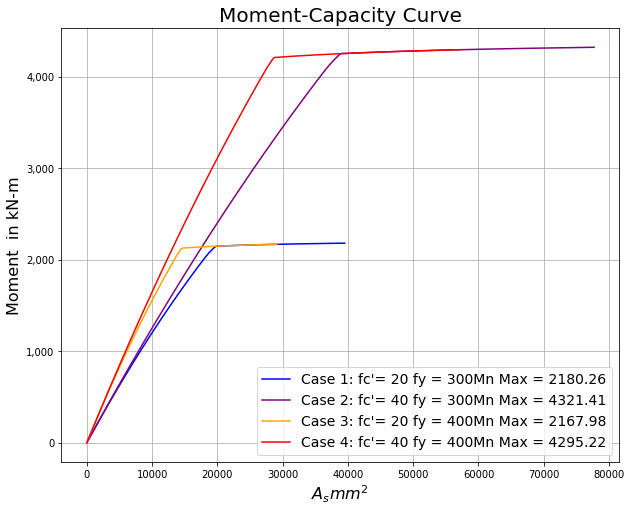

In [5]:
# Plot the curves
plt.figure(figsize=(10,8))
plt.title("Moment-Capacity Curve", fontsize=20)
plt.xlabel(r'$A_s mm^2$', fontsize=16)
plt.ylabel('Moment  in kN-m', fontsize=16)
plt.grid()

# Plot the converted values
case1, = plt.plot(As[0], M[0], label='Case 1: fc\'= '+ str(fcPrime[0]) + ' fy = ' +\
                  str(fy[0]) + 'Mn Max = ' + str(round(MnMax[0]/1000**2,2)), color='blue')
case2, = plt.plot(As[1], M[1], label='Case 2: fc\'= '+ str(fcPrime[1]) + ' fy = ' +\
                  str(fy[1]) + 'Mn Max = ' + str(round(MnMax[1]/1000**2,2)), color='purple')
case3, = plt.plot(As[2], M[2], label='Case 3: fc\'= '+ str(fcPrime[2]) + ' fy = ' +\
                  str(fy[2]) + 'Mn Max = ' + str(round(MnMax[2]/1000**2,2)), color='orange')
case4, = plt.plot(As[3], M[3], label='Case 4: fc\'= '+ str(fcPrime[3]) + ' fy = ' +\
                  str(fy[3]) + 'Mn Max = ' + str(round(MnMax[3]/1000**2,2)), color='red')

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_formatter = tkr.FuncFormatter(func)

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_formatter)

plt.legend(handles=[case1, case2, case3, case4], loc='best', fontsize=14)
plt.show()